In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [24]:
df_month7_Geo = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/202271month_per_hour_in_disaster.csv',engine='python')

In [25]:
df_month7_Geo["created_at"]=df_month7_Geo["created_at"].astype(str)
created_time=df_month7_Geo.created_at.values
creatid_at_day_list = []
creatid_at_hour_list = []
for i in created_time:
    creatid_at_day_list.append(i[8:10])
    creatid_at_hour_list.append(i[11:13])
creatid_at_day_list = pd.Series(creatid_at_day_list)
creatid_at_hour_list = pd.Series(creatid_at_hour_list)
df_month7_Geo=pd.concat([df_month7_Geo,creatid_at_day_list],axis=1)
df_month7_Geo=df_month7_Geo.rename(columns={0: 'creatid_at_day'})
df_month7_Geo=pd.concat([df_month7_Geo,creatid_at_hour_list],axis=1)
df_month7_Geo=df_month7_Geo.rename(columns={0: 'creatid_at_hour'})

In [26]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [27]:
df_month7_Geo = df_month7_Geo[df_month7_Geo['creatid_at_day'].isin(day_list)]
df_month7_Geo = df_month7_Geo[df_month7_Geo['creatid_at_hour'].isin(hour_list)]

In [28]:
df_month7_Geo['created_at'] = pd.to_datetime(df_month7_Geo['created_at'],format="%Y-%m-%d_%H:%M:%S")
df_month7_Geo = df_month7_Geo.dropna(subset=['created_at'])

In [29]:
list_tweet_range_month7_Geo = []
for day in day_list:
    day = int(day)
    df_perday = df_month7_Geo[(df_month7_Geo['created_at'].dt.day==day)]
    list_tweet_range_month7_Geo_per_day = []
    for hour in hour_list:
        hour = int(hour)
        df_perhour = df_perday[(df_perday['created_at'].dt.hour==hour)]
        end_time = df_perhour .head(1)['created_at'].values
        start_time = df_perhour .tail(1)['created_at'].values
        if (len(df_perhour)==0 or len(df_perhour)==1):
            delta = 999
        elif (start_time==end_time):
            delta = 2
        else:
            delta = int(end_time-start_time)*(10**(-9))
        #print(f"{start_time} {end_time} {delta}")
        list_tweet_range_month7_Geo_per_day.append(delta)
    list_tweet_range_month7_Geo.append(list_tweet_range_month7_Geo_per_day)
list_tweets_count_month7_Geo = []
for day in day_list:
    day = int(day)
    df_perday = df_month7_Geo[(df_month7_Geo['created_at'].dt.day==day)]
    dict_count_per_hour = df_perday["creatid_at_hour"].value_counts(sort=False).to_dict()
    list_tweets_count_month7_Geo_per_hour = []
    for hour in hour_list:
        if hour in dict_count_per_hour:
            list_tweets_count_month7_Geo_per_hour.append(dict_count_per_hour[hour])
        else:
            list_tweets_count_month7_Geo_per_hour.append(0)
    list_tweets_count_month7_Geo.append(list_tweets_count_month7_Geo_per_hour)
list_tweet_range_month7_Geo = np.array(list_tweet_range_month7_Geo)
list_tweets_count_month7_Geo = np.array(list_tweets_count_month7_Geo)
estimate_month7_Geo = list_tweets_count_month7_Geo*(3600/list_tweet_range_month7_Geo)

In [30]:
np.save('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_month7_Geo', estimate_month7_Geo)

Text(69.0, 0.5, 'hour')

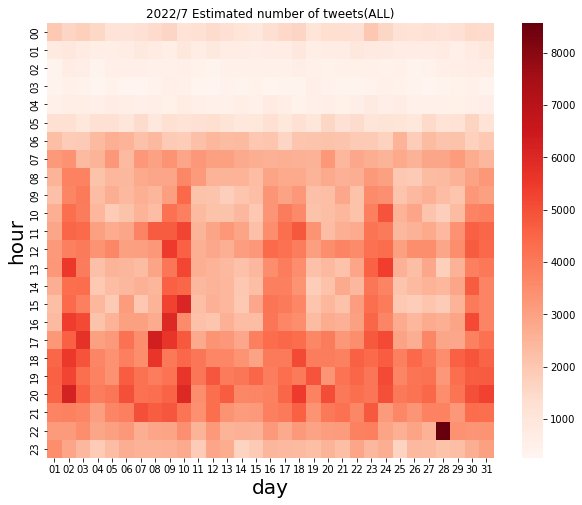

In [31]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_month7_Geo.T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of tweets(ALL)')
heatmap.set_xlabel('day',fontsize=20)
heatmap.set_ylabel('hour',fontsize=20)